# ML Exploration Notebook

This notebook can be used to explore the data of an underlying problem and see if the data is suited for predictive analysis. Several classifiers will be compared on predictive performance metrics such as accuracy, precision, recall and area under curve, such that the user can get a head start in solving the problem or managing expectations.

The notebook is structured in the following way:

    1. Set project path
    2. Read in (raw) Data Set
    3. Basic Data Information
    4. Set Dependent & Independent Variables 
    5. Set Parameter Values
    6. Generate Predictions
    7. Compare Models

### 1. Set project path

In order to make use of the files stored on Github via Colab, we first have to clone the folder on Github to the current Colab-folder.

In [6]:
# Clone the entire repo. Remove the # from the next two lines.
#!git clone -s git://github.com/PippleNL/Pipple-Lecture-8-ML-prediction.git ML_copy
#%cd ML_copy

We will use package os to set the correct project_path.

In [4]:
import os
project_path = os.getcwd()

### 2. Read in (raw) Data Set

The (raw) data set of the underlying problem is read from a comma seperated file (.csv). 

In [5]:
import pandas as pd
data_path = os.path.join(project_path, 'data', 'Beer_data.csv')
data = pd.read_csv(data_path)

### 3. Basic Data Information

Below you can find some basic information of the data set. It lists the first couple of rows, a summary of the dataframe including the dtype and number of non-null values per column and the shape of the dataframe.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 15 columns):
Calories              5197 non-null float64
Density               5197 non-null float64
Frequency             5197 non-null object
Driving_afterwards    5197 non-null int64
Belgian               5197 non-null object
Special               5197 non-null object
Pct_alcohol           5197 non-null float64
Pct_protein           5197 non-null float64
Pct_yeast             5197 non-null float64
pct_hop               5197 non-null float64
Score_others          5197 non-null float64
Sugar                 5197 non-null float64
Water_quality         5197 non-null float64
Acid                  5197 non-null float64
Score                 5197 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 609.1+ KB


In [8]:
data.head()

,Calories,Density,Frequency,Driving_afterwards,Belgian,Special,Pct_alcohol,Pct_protein,Pct_yeast,pct_hop,Score_others,Sugar,Water_quality,Acid,Score
0,12.0,0.9916,Almost_never,0,no,N,6.4,12.9,1.10,13.8,5.8,1.65,0.53,0.00,Good
1,55.0,0.9965,Very Often,0,no,N,9.3,10.9,1.60,7.2,5.8,1.50,0.73,0.39,Good
2,118.0,0.9908,Very Often,0,no,Y,7.1,11.2,0.78,5.6,2.6,2.80,0.59,0.26,Good
3,151.0,0.9926,Regular,0,yes,Y,6.7,12.0,0.62,6.2,5.0,4.90,0.82,0.31,Excellent
4,228.0,0.9957,Often,0,no,Y,7.0,9.4,0.96,6.4,4.0,6.20,0.62,0.24,Good


If you'd like to change a column's dtype to numeric, please add this column to the list of strings below (e.g. columns2num = ['Sugar'])

In [9]:
from functions.data_preparation import column2num
columns2num = []

if len(columns2num) > 0:
    data = column2num(data, columns2num)

We can check the number of NaN values for each column.

In [10]:
data.isnull().sum()

Calories              0
Density               0
Frequency             0
Driving_afterwards    0
Belgian               0
Special               0
Pct_alcohol           0
Pct_protein           0
Pct_yeast             0
pct_hop               0
Score_others          0
Sugar                 0
Water_quality         0
Acid                  0
Score                 0
dtype: int64

We'll state the number of unique values per column. If a column only has one value, it will not have any impact on a prediction.

In [11]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':', data[i].nunique())

Unique Values for Each Feature: 

Calories : 274
Density : 150
Frequency : 5
Driving_afterwards : 1
Belgian : 2
Special : 2
Pct_alcohol : 105
Pct_protein : 104
Pct_yeast : 201
pct_hop : 178
Score_others : 86
Sugar : 303
Water_quality : 103
Acid : 87
Score : 3


We can have a look at the correlation matrix to get an idea of relations between variables.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = round(data.corr(method='pearson'), 2)
sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, annot=True, cmap=sns.diverging_palette(20, 220, n=200), square=True)

### 4. Set Dependent & Independent Variables

Specify below in string which variable (i.e. column) will be used as dependent variable. This variable will be set as y (i.e. label) and will ultimately be modeled. Also, specify a list of other (independent) variables in string that are used to explain the dependent variable. If empty, all other variables will be used.

In [13]:
data.columns

Index(['Calories', 'Density', 'Frequency', 'Driving_afterwards', 'Belgian',
       'Special', 'Pct_alcohol', 'Pct_protein', 'Pct_yeast', 'pct_hop',
       'Score_others', 'Sugar', 'Water_quality', 'Acid', 'Score'],
      dtype='object')

In [14]:
dependent = 'Score'  # fill in your dependent variable here...
independent = ['Calories', 'Density', 'Frequency', 'Driving_afterwards', 'Belgian', 'Special', 'Pct_alcohol'
               , 'Pct_protein', 'Pct_yeast', 'pct_hop', 'Score_others'
               , 'Sugar', 'Water_quality', 'Acid']  # fill the list of independent variables here...

### 5. Set Parameter Values

Specify below the parameter values used while comparing models. If kept commented, the default value will be used. If uncommented, added these parameters to the function main.

In [15]:
impute_strategy = 0.  # either a float or 'drop' (default), 'mean', 'median', 'most_frequent'
labelenc_x = ['Belgian', 'Special']  # fill the list of independent variables for label encoding here...
onehotenc_x = ['Frequency']  # fill the list of independent variables for one hot encoding
labelenc_y = True  # boolean specifying if label encoding for y variable is necessary
feature_scaling = 'auto'  # None, 'standardisation', 'minmax' or 'auto'

### 6. Generate Predictions

Predictions are generated for several models using the function main from the Python script compare_models. Note that if not specified differently, all default parameter values are used. More information can be retrieved by running 'main_classification()'. The function gives two lists; predictions and classes.

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from functions.compare_models import main_classification
predictions, classes = main_classification(data, dependent, independent, impute_strategy=impute_strategy, labelenc_x=labelenc_x, onehotenc_x=onehotenc_x, feature_scaling_method=feature_scaling)

### 7. Compare Models

Models are compared based on predictive performance metrics that are calculated and sorted by the (own-developed) function 'sort_compute_metrics_clf' in the Python script 'compare_models'. More information on the function can be retrieved using sort_compute_metrics_clf().

In [17]:
from functions.compare_models import sort_compute_metrics_clf
multi_class = True if len(classes) > 2 else False
header, scores = sort_compute_metrics_clf(predictions, multi_class=multi_class)
pd.DataFrame(scores, columns=header)

,model,accuracy,precision,recall,F1,auc
0,RandomForest,0.700962,0.703397,0.700962,0.701323,-
1,svc,0.612500,0.617062,0.612500,0.608057,-
2,logistic,0.589423,0.590319,0.589423,0.584665,-
3,knn,0.545192,0.546280,0.545192,0.545164,-
4,naive,0.495192,0.527988,0.495192,0.499847,-


Accuracy = ratio of correctly predicted classes -> (True Positive + True Negative)/(all observations)
Precision = Given that model predicts True, how many are true -> (True Positive)/(True Positive + False Positive)
recall = Ratio of actual True labels guessed by the model -> (True Positive) / (True Positive + False Negative)
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

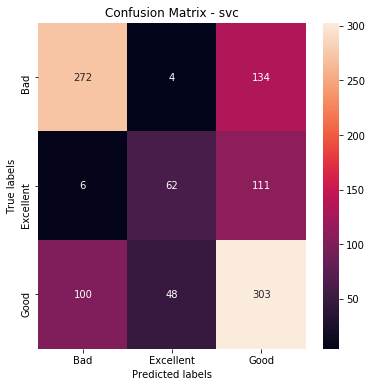

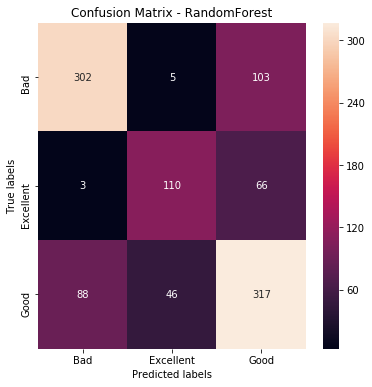

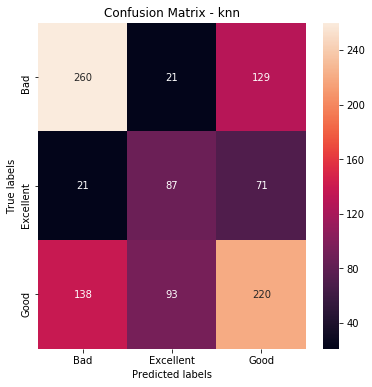

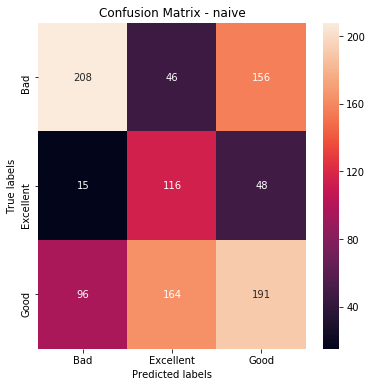

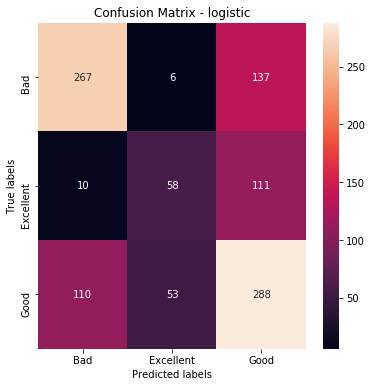

In [53]:
from sklearn.metrics import confusion_matrix
%matplotlib inline

for i in range(0,len(predictions)):
    
    cm = confusion_matrix(predictions[i][2], predictions[i][1])
    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                      columns = [i for i in classes])
    plt.figure(figsize = (6,6))
    ax = plt.subplot()
    sns.heatmap(df_cm, annot=True, ax = ax, fmt='.3g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix - '+ predictions[i][0])